In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 



{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("import adult.data",header = None)

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
data.columns = columns

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() /  2, height, str(int(height)), ha='center', va='bottom')

data


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


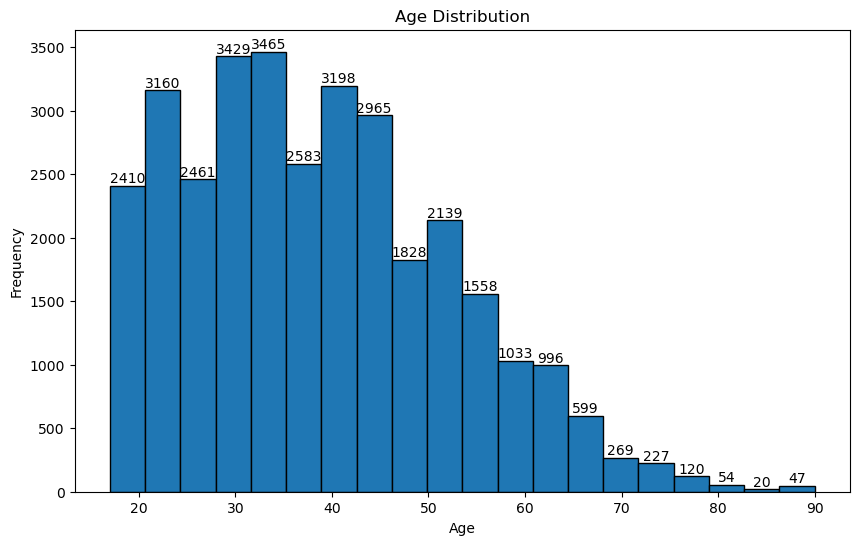

In [12]:
# Plot for 'age' attribute
dataAge = data["age"]
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataAge, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)  # Turn off the grid for better visualization
def add_age_labels(patches, n):
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width() /  2
        y = patches[i].get_height()
        plt.text(x, y, int(y), ha='center', va='bottom')

# Call the function to add labels
add_age_labels(patches, n)

plt.show()

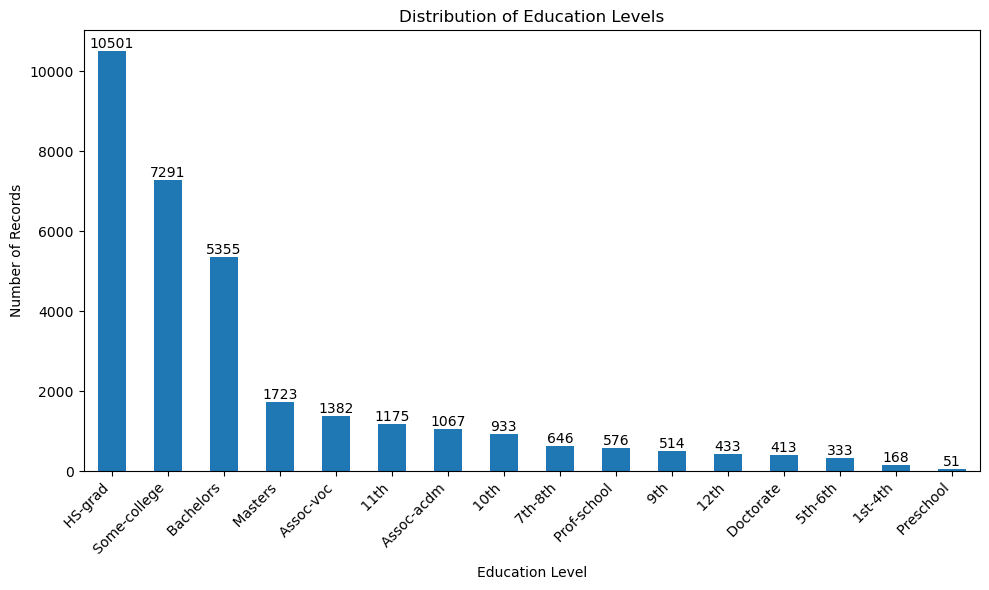

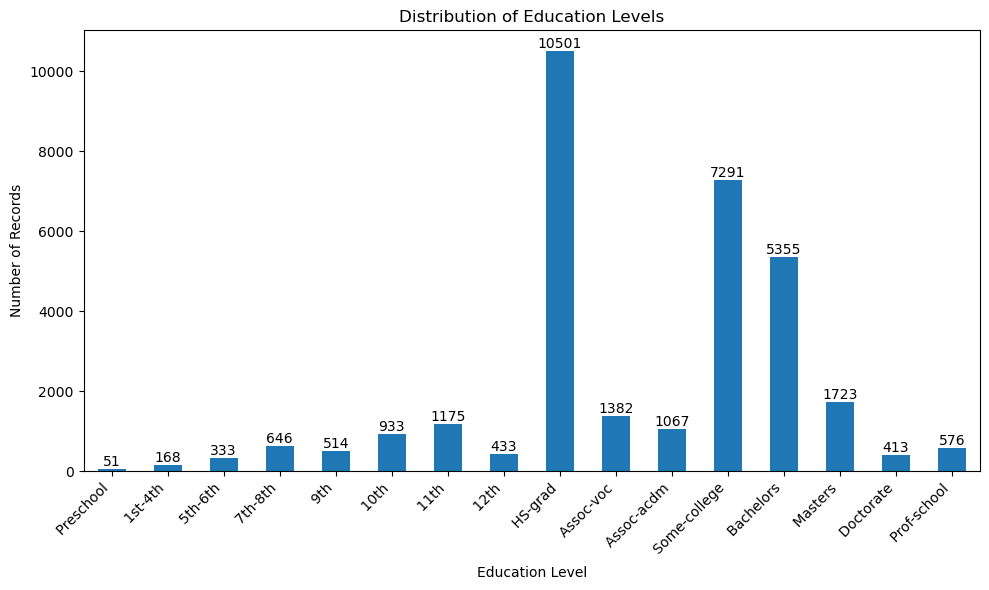

In [13]:


# Plot for 'education' attribute
plt.figure(figsize=(10, 6))
education_count = data['education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
add_labels(education_count.patches)
plt.show()







# Define the order you want the education levels to appear
ordered_categories = [
    ' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th',  ' 12th', ' HS-grad', 
    ' Assoc-voc', ' Assoc-acdm', ' Some-college', ' Bachelors', ' Masters', ' Doctorate',
     ' Prof-school',
]

# Set the categorical order for 'education'
data['education'] = pd.Categorical(data['education'], categories=ordered_categories, ordered=True)

# Sort the DataFrame based on the ordered categories
sorted_data = data['education'].value_counts().sort_index()

# Plot the sorted data
plt.figure(figsize=(10, 6))
education_count = sorted_data.plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels

# Assuming 'add_labels' is a function you've defined to add labels to the bars
add_labels(education_count.patches)

plt.show()



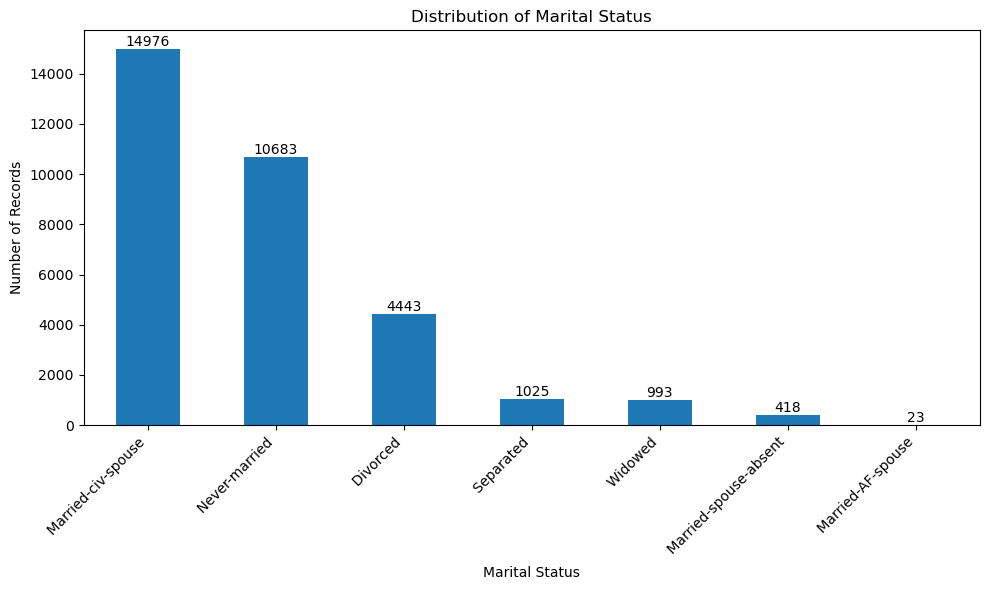

In [14]:
# Plot for 'marital_status' attribute
plt.figure(figsize=(10, 6))
marital_status_count = data['marital_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
add_labels(marital_status_count.patches)
plt.show()

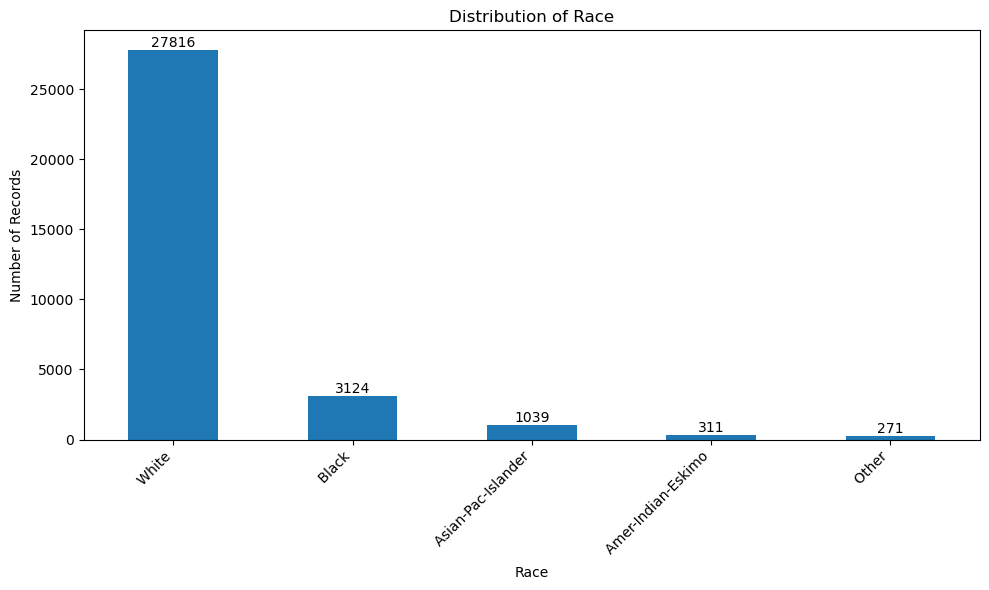

In [15]:
plt.figure(figsize=(10,  6))
race_count = data['race'].value_counts().plot(kind='bar')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
add_labels(race_count.patches)

plt.show()

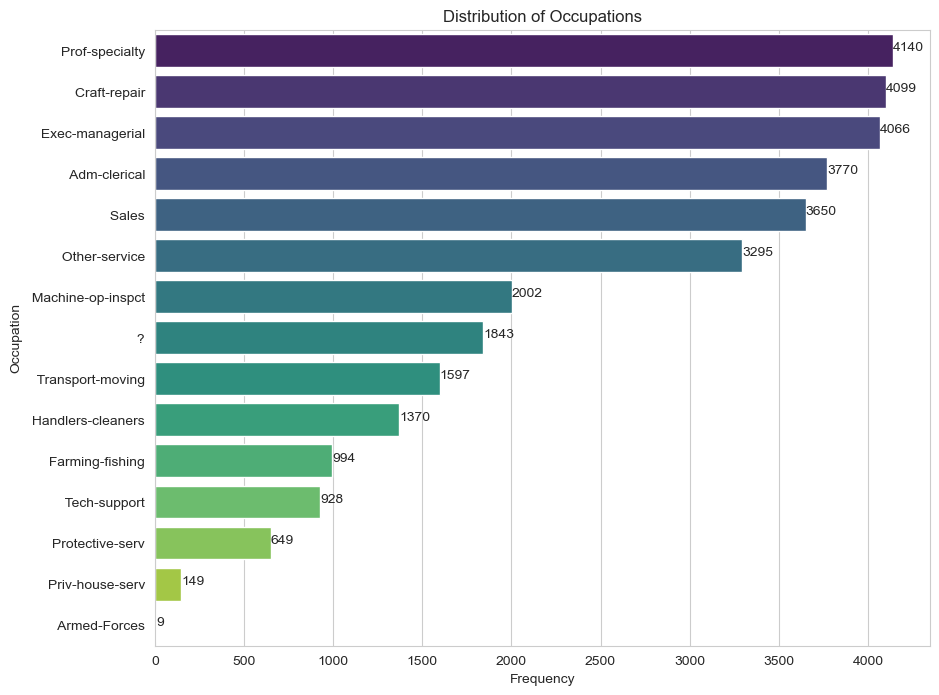

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Count the occurrence of each unique value in the 'Occupation' column and create a bar plot
plt.figure(figsize=(10, 8))  # Adjust the size of the plot as needed
occupation_count = data['occupation'].value_counts()
sns.barplot(x=occupation_count, y=occupation_count.index, palette="viridis")

# Adding labels and title for clarity
plt.xlabel('Frequency')
plt.ylabel('Occupation')
plt.title('Distribution of Occupations')

for index, value in enumerate(occupation_count):
    plt.text(value, index, str(value))


# Show the plot
plt.show()

In [17]:
from queue import Queue


class Node:

    def __init__(self, data):

        self.data = data
        self.parent = None
        self.children = dict()

        #Dictionary whose values are the node children and whose keys are the corresponding nodes data.


    def add_child(self, child):

        child.parent = self
        self.children[child.data] = child


class Tree:

    def __init__(self, root: Node):

        self.root = root

    def bfs_search(self, data, depth=None):

        
        #Searches for a node, given its data. The search starts from the root.


        visited, queue = set(), Queue()
        # Each element of the queue is a couple (node, level):
        queue.put((self.root, 0))

        while not queue.empty():

            node, level = queue.get()

            if depth is not None and level > depth:
                break

            if depth is None:
                if node.data == data:
                    return node
            else:
                if level == depth and node.data == data:
                    return node

            for child in node.children.values():
                if child in visited:
                    continue
                queue.put((child, level + 1))

            visited.add(node)

        return None

    def _bfs_insert(self, child: Node, parent: Node) -> bool:

        node = self.bfs_search(parent.data)
        if node is not None:
            node.add_child(child)
            return True
        else:
            return False

    def insert(self, child: Node, parent: Node) -> bool:

        
        #Inserts a node given its parent. Note: insertion is done on the first node with the samedata as the given parent node.


        return self._bfs_insert(child, parent)

    def parent(self, data):


        #Gets the parent of a node, given the node data.



        node = self.bfs_search(data)

        if node is not None:
            return node.parent
        else:
            return None

In [18]:
import csv
from io import StringIO

class DGH:
    def __init__(self, dgh_path):
        #store the value of the hierarchy
        self.hierarchies = dict()
        #store the level that the generalization are
        self.gen_levels = dict()
        
        
    def generalize(self, value, gen_level=None):
        for hierarchy in self.hierarchies:
            if gen_level is None:
                node = self.hierarchies[hierarchy].bfs_search(value)
            else:
               node = self.hierarchies[hierarchy].bfs_search(value, self.gen_levels[hierarchy] - gen_level)
            
            if node is None:
                continue
            elif node.parent is None:
                return None
            else: 
                return node.parent.data
            
        raise KeyError(value)
        
class CsvDGH(DGH):

    def __init__(self, dgh_path):

        super().__init__(dgh_path)

        try:
            with open(dgh_path, 'r') as file:
                for line in file:

                    try:
                        csv_reader = csv.reader(StringIO(line), delimiter=';')
                    except IOError:
                        raise
                    values = next(csv_reader)

                    # If it doesn't exist a hierarchy with this root, add one:
                    if values[-1] not in self.hierarchies:
                        self.hierarchies[values[-1]] = Tree(Node(values[-1]))
                        # Add the number of generalization levels:
                        self.gen_levels[values[-1]] = len(values) - 1
                    # Populate hierarchy with the other values:
                    self._insert_hierarchy(values[:-1], self.hierarchies[values[-1]])

        except FileNotFoundError:
            raise
        except IOError:
            raise

    @staticmethod
    def _insert_hierarchy(values, tree):


        #Inserts values, ordered from child to parent, to a tree.


        current_node = tree.root

        for i, value in enumerate(reversed(values)):

            if value in current_node.children:
                current_node = current_node.children[value]
                continue
            else:
                # Insert the hierarchy from this node:
                for v in list(reversed(values))[i:]:
                    current_node.add_child(Node(v))
                    current_node = current_node.children[v]
                return True

        return False

In [19]:
import argparse
import csv
import sys
from datetime import datetime
from io import StringIO
import os


_DEBUG = False


class _Table:

    def __init__(self, pt_path: str, dgh_paths: dict):

        #Instantiates a table and the specified Domain Generalization Hierarchies from the corresponding files.



        self.table = None

        #Reference to the table file.

        self.attributes = dict()
        
        #Dictionary whose keys are the table attributes names and whose values are the corresponding column indices.
        
        self._init_table(pt_path)
        
        #Reference to the table file.
        
        self.dghs = dict()
    
        #Dictionary whose values are DGH instances and whose keys are the corresponding attribute names.
        
        for attribute in dgh_paths:
            self._add_dgh(dgh_paths[attribute], attribute)

    def __del__(self):


        #Closes the table file.


        self.table.close()

    def anonymize(self, qi_names: list, k: int, output_path: str, v=True):


        global _DEBUG

        if v:
            _DEBUG = False

        self._debug("[DEBUG] Creating the output file...", _DEBUG)
        # try:
        #     output = open(output_path, 'w+')
        # except IOError:
        #     raise
        # self._log("[LOG] Created output file.", endl=True, enabled=v)

        # Start reading the table file from the top:
        self.table.seek(0)

        self._debug("[DEBUG] Instantiating the QI frequency dictionary...", _DEBUG)
        # Dictionary whose keys are sequences of values for the Quasi Identifiers and whose values
        # are couples (n, s) where n is the number of occurrences of a sequence and s is a set
        # containing the indices of the rows in the original table file with those QI values:
        qi_frequency = dict()

        self._debug("[DEBUG] Instantiating the attributes domains dictionary...", _DEBUG)
        # Dictionary whose keys are the indices in the QI attribute names list, and whose values are
        # sets containing the corresponding domain elements:
        domains = dict()
        for i, attribute in enumerate(qi_names):
            domains[i] = set()

        # Dictionary whose keys are the indices in the QI attribute names list, and whose values are
        # the current levels of generalization, from 0 (not generalized):
        gen_levels = dict()
        for i, attribute in enumerate(qi_names):
            gen_levels[i] = 0

        for i, row in enumerate(self.table):

            qi_sequence = self._get_values(row, qi_names, i)

            # Skip if this row must be ignored:
            if qi_sequence is None:
                self._debug("[DEBUG] Ignoring row %d with values '%s'..." % (i, row.strip()),
                            _DEBUG)
                continue
            else:
                qi_sequence = tuple(qi_sequence)

            if qi_sequence in qi_frequency:
                occurrences = qi_frequency[qi_sequence][0] + 1
                rows_set = qi_frequency[qi_sequence][1].union([i])
                qi_frequency[qi_sequence] = (occurrences, rows_set)
            else:
                # Initialize number of occurrences and set of row indices:
                qi_frequency[qi_sequence] = (1, set())
                qi_frequency[qi_sequence][1].add(i)

                # Update domain set for each attribute in this sequence:
                for j, value in enumerate(qi_sequence):
                    domains[j].add(value)

            self._log("[LOG] Read line %d from the input file." % i, endl=False, enabled=v)

        self._log('', endl=True, enabled=v)

        lines = []
        while True:

            # Number of tuples which are not k-anonymous.
            count = 0

            for qi_sequence in qi_frequency:

                # Check number of occurrences of this sequence:
                if qi_frequency[qi_sequence][0] < k:
                    # Update the number of tuples which are not k-anonymous:
                    count += qi_frequency[qi_sequence][0]
            self._debug("[DEBUG] %d tuples are not yet k-anonymous..." % count, _DEBUG)
            self._log("[LOG] %d tuples are not yet k-anonymous..." % count, endl=True, enabled=v)

            # Limit the number of tuples to suppress to k:
            if count > k:

                # Get the attribute whose domain has the max cardinality:
                max_cardinality, max_attribute_idx = 0, None
                for attribute_idx in domains:
                    if len(domains[attribute_idx]) > max_cardinality:
                        max_cardinality = len(domains[attribute_idx])
                        max_attribute_idx = attribute_idx

                # Index of the attribute to generalize:
                attribute_idx = max_attribute_idx
                self._debug("[DEBUG] Attribute with most distinct values is '%s'..." %
                            qi_names[attribute_idx], _DEBUG)
                self._log("[LOG] Current attribute with most distinct values is '%s'." %
                          qi_names[attribute_idx], endl=True, enabled=v)

                # Generalize each value for that attribute and update the attribute set in the
                # domains dictionary:
                domains[attribute_idx] = set()
                # Look up table for the generalized values, to avoid searching in hierarchies:
                generalizations = dict()

                # Note: using the list of keys since the dictionary is changed in size at runtime
                # and it can't be used an iterator:
                for j, qi_sequence in enumerate(list(qi_frequency)):

                    self._log("[LOG] Generalizing attribute '%s' for sequence %d..." %
                              (qi_names[attribute_idx], j), endl=False, enabled=v)

                    # Get the generalized value:
                    if qi_sequence[attribute_idx] in generalizations:
                        # Find directly the generalized value in the look up table:
                        generalized_value = generalizations[attribute_idx]
                    else:
                        self._debug(
                            "[DEBUG] Generalizing value '%s'..." % qi_sequence[attribute_idx],
                            _DEBUG)
                        # Get the corresponding generalized value from the attribute DGH:
                       
                        # print(self.dghs[qi_names[attribute_idx]])
                        try:
                            generalized_value = self.dghs[qi_names[attribute_idx]].generalize(
                                qi_sequence[attribute_idx],
                                gen_levels[attribute_idx])
                        except KeyError as error:
                            self._log('', endl=True, enabled=True)
                            self._log("[ERROR] Value '%s' is not in hierarchy for attribute '%s'."
                                      % (error.args[0], qi_names[attribute_idx]),
                                      endl=True, enabled=True)
                            # output.close()
                            return

                        if generalized_value is None:
                            # Skip if it's a hierarchy root:
                            continue

                        # Add to the look up table:
                        generalizations[attribute_idx] = generalized_value

                    # Tuple with generalized value:
                    new_qi_sequence = list(qi_sequence)
                    new_qi_sequence[attribute_idx] = generalized_value
                    new_qi_sequence = tuple(new_qi_sequence)

                    # Check if there is already a tuple like this one:
                    if new_qi_sequence in qi_frequency:
                        # Update the already existing one:
                        # Update the number of occurrences:
                        occurrences = qi_frequency[new_qi_sequence][0] \
                                      + qi_frequency[qi_sequence][0]
                        # Unite the row indices sets:
                        rows_set = qi_frequency[new_qi_sequence][1]\
                            .union(qi_frequency[qi_sequence][1])
                        qi_frequency[new_qi_sequence] = (occurrences, rows_set)
                        # Remove the old sequence:
                        qi_frequency.pop(qi_sequence)
                    else:
                        # Add new tuple and remove the old one:
                        qi_frequency[new_qi_sequence] = qi_frequency.pop(qi_sequence)

                    # Update domain set with this attribute value:
                    domains[attribute_idx].add(qi_sequence[attribute_idx])

                self._log('', endl=True, enabled=v)

                # Update current level of generalization:
                gen_levels[attribute_idx] += 1

                self._log("[LOG] Generalized attribute '%s'. Current generalization level is %d." %
                          (qi_names[attribute_idx], gen_levels[attribute_idx]), endl=True,
                          enabled=v)

            else:

                self._debug("[DEBUG] Suppressing max k non k-anonymous tuples...")
                # Drop tuples which occur less than k times:
                qi_sequences = []
                for qi_sequence, data in qi_frequency.items():
                    if data[0] < k:
                        qi_sequences.append(qi_sequence)
                for qi_sequence in qi_sequences:
                    qi_frequency.pop(qi_sequence)

                self._log("[LOG] Suppressed %d tuples." % count, endl=True, enabled=v)

                # Start to read the table file from the start:
                self.table.seek(0)

                self._debug("[DEBUG] Writing the anonymized table...", _DEBUG)
                self._log("[LOG] Writing anonymized table...", endl=True, enabled=v)
                for i, row in enumerate(self.table):

                    self._debug("[DEBUG] Reading row %d from original table..." % i, _DEBUG)
                    table_row = self._get_values(row, list(self.attributes), i)

                    # Skip this row if it must be ignored:
                    if table_row is None:
                        self._debug("[DEBUG] Skipped reading row %d from original table..." % i,
                                    _DEBUG)
                        continue

                    # Find sequence corresponding to this row index:
                    for qi_sequence in qi_frequency:
                        if i in qi_frequency[qi_sequence][1]:
                            line = self._set_values(table_row, qi_sequence, qi_names)
                            lines.append(line.strip().split(','))
                            self._debug("[DEBUG] Writing line %d from original table to anonymized "
                                        "table..." % i, _DEBUG)
                            # print(line, file=output, end="")
                            break

                break

        # output.close()

        self._log("[LOG] All done.", endl=True, enabled=v)
        return lines

    @staticmethod
    def _log(content, enabled=True, endl=True):


        #Prints a log message.


        if enabled:
            if endl:
                print(content)
            else:
                sys.stdout.write('\r' + content)

    @staticmethod
    def _debug(content, enabled=False):


        #Prints a debug message.

        if enabled:
            print(content)

    def _init_table(self, pt_path: str):


        #Gets a reference to the table file and instantiates the attribute dictionary.


        try:
            self.table = open(pt_path, 'r')
        except FileNotFoundError:
            raise

    def _get_values(self, row: str, attributes: list, row_index=None):
        
        #Gets the values corresponding to the given attributes from a row.


        # Ignore empty lines:
        if row.strip() == '':
            return None

    def _set_values(self, row, values, attributes: list) -> str:

        #Sets the values of a row for the given attributes and returns the row as a formatted string.


        pass

    def _add_dgh(self, dgh_path: str, attribute: str):


        #Adds a Domain Generalization Hierarchy to this table DGH collection, from its file.

 

        pass


class CsvTable(_Table):

    def __init__(self, pt_path: str, dgh_paths: dict):

        super().__init__(pt_path, dgh_paths)

    def __del__(self):

        super().__del__()

    def anonymize(self, qi_names, k, output_path, v=False):

        return super().anonymize(qi_names, k, output_path, v)

    def _init_table(self, pt_path):

        super()._init_table(pt_path)

        try:
            # Try to read the first line (which contains the attribute names):
            csv_reader = csv.reader(StringIO(next(self.table)), delimiter=';')
        except IOError:
            raise

        # Initialize the dictionary of table attributes:
        for i, attribute in enumerate(next(csv_reader)):
            self.attributes[attribute] = i

    def _get_values(self, row: str, attributes: list, row_index=None):

        super()._get_values(row, attributes, row_index)

        # Ignore the first line (which contains the attribute names):
        if row_index is not None and row_index == 0:
            return None

        # Try to parse the row:
        try:
            csv_reader = csv.reader(StringIO(row), delimiter=';')
        except IOError:
            raise
        parsed_row = next(csv_reader)
      
        values = list()
        for attribute in attributes:
            if attribute in self.attributes:
                values.append(parsed_row[self.attributes[attribute]])
            else:
                raise KeyError(attribute)

        return values

    def _set_values(self, row: list, values, attributes: list):

        for i, attribute in enumerate(attributes):
            row[self.attributes[attribute]] = values[i]

        values = StringIO()
        csv_writer = csv.writer(values)
        csv_writer.writerow(row)

        return values.getvalue()

    def _add_dgh(self, dgh_path, attribute):

        try:
            self.dghs[attribute] = CsvDGH(dgh_path)
        except FileNotFoundError:
            raise
        except IOError:
            raise


def datafly(k, qi_names, csv_path, data_name, dgh_folder, res_folder):
 
    start = datetime.now()

    dgh_paths = dict()
    for i, qi_name in enumerate(qi_names):
        dgh_paths[qi_name] = os.path.join(dgh_folder, f'{data_name}_hierarchy_{qi_name}.csv')
    
    output = f"{res_folder}/{data_name}_anonymized_{k}.csv"
    table = CsvTable(csv_path, dgh_paths)
    data = table.anonymize(qi_names, k, output, v=False)

    end = (datetime.now() - start).total_seconds()

    return data, end



In [20]:
import os

def datafly_anonymize(k, csv_path, qi_names, data_name, dgh_folder, res_folder):
    return datafly(k, qi_names, csv_path, data_name, dgh_folder, res_folder)

In [21]:
if __name__ == "__main__":
    # Define the parameters
    
    data_to_seperate_by_salary = pd.read_csv('address of seperated data', delimiter=';')
    
    columns = ['ID', 'sex', 'age', 'race', 'marital-status', 'education',
             'native_country','workclass', 'occupation', 'salary-class']
    data_to_seperate_by_salary.columns = columns
    
    columns_to_drop = ['ID', 'sex', 'native_country','workclass']
    
    data_to_seperate_by_salary.drop(columns=columns_to_drop, inplace=True) 
    
    df_salary_lesseq_50k = data_to_seperate_by_salary[data_to_seperate_by_salary['salary-class'] == '<=50K']
    df_salary_greater_50k = data_to_seperate_by_salary[data_to_seperate_by_salary['salary-class'] == '>50K']
    
    df_salary_lesseq_50k.to_csv('address of seperated data lesseq 50k', index=False, sep=';')
    df_salary_greater_50k.to_csv('address of seperated data greater 50k', index=False, sep=';')
    
    k1 = 10  # Value of k for k-anonymity
    qi_names_k1 = ['age', 'education', 'marital-status', 'race']  # List of Quasi Identifiers
    csv_path_k1 = 'address of csv path'  # Path to the CSV table to anonymize
    data_name_k1 = 'adult_data'  # Name of the dataset
    dgh_folder_k1 = 'address of hierarchy'  # Folder containing the Domain Generalization Hierarchies
    res_folder_k1 = 'address of hierarchy'  # Folder where the anonymized data will be saved

    k2 = 5  # Value of k for k-anonymity
    qi_names_k2 = ['age', 'education', 'marital-status', 'race']  # List of Quasi Identifiers
    csv_path_k2 = 'address of csv path'  # Path to the CSV table to anonymize
    data_name_k2 = 'adult_data'  # Name of the dataset
    dgh_folder_k2 = 'address of hierarchy'  # Folder containing the Domain Generalization Hierarchies
    res_folder_k2 = 'address of hierarchy'  # Folder where the anonymized data will be saved
    
    

    anonymized_data1, execution_time1 = datafly(k1, qi_names_k1, csv_path_k1, data_name_k1, dgh_folder_k1, res_folder_k1)
    anonymized_data2, execution_time2 = datafly(k2, qi_names_k2, csv_path_k2, data_name_k2, dgh_folder_k2, res_folder_k2)
    
    anonymized_data = anonymized_data1 + anonymized_data2
       
    for row in anonymized_data:
        print(row)
    
    

['0~40', 'White', '*', '*', 'Handlers-cleaners', '<=50K']
['41~', 'Black', '*', '*', 'Handlers-cleaners', '<=50K']
['0~40', 'White', '*', '*', 'Exec-managerial', '<=50K']
['41~', 'Black', '*', '*', 'Other-service', '<=50K']
['0~40', 'Black', '*', '*', 'Sales', '<=50K']
['0~40', 'Amer-Indian-Eskimo', '*', '*', 'Transport-moving', '<=50K']
['0~40', 'White', '*', '*', 'Farming-fishing', '<=50K']
['0~40', 'White', '*', '*', 'Machine-op-inspct', '<=50K']
['0~40', 'White', '*', '*', 'Sales', '<=50K']
['41~', 'Black', '*', '*', 'Other-service', '<=50K']
['0~40', 'Black', '*', '*', 'Farming-fishing', '<=50K']
['41~', 'White', '*', '*', 'Transport-moving', '<=50K']
['41~', 'White', '*', '*', 'Tech-support', '<=50K']
['0~40', 'White', '*', '*', 'Craft-repair', '<=50K']
['0~40', 'White', '*', '*', 'Exec-managerial', '<=50K']
['41~', 'White', '*', '*', 'Craft-repair', '<=50K']
['0~40', 'White', '*', '*', 'Protective-serv', '<=50K']
['0~40', 'Black', '*', '*', 'Sales', '<=50K']
['0~40', 'White', '*

In [ ]:
import csv

# File path to write the CSV file
file_path = '/address you want to store'

header = ['Age', 'Race', 'marital-status', 'education', 'occupation','salary-class']

# Writing the list to a CSV file
with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    writer.writerows(anonymized_data)

print("List has been written to", file_path)

In [25]:
def calculate_precision(gen_levels_att, dgh_att, attribute_size):

        #Calculate the precision of generalized value for each value of each attribute.
        return  1 - calculate_distortion(gen_levels_att, dgh_att, attribute_size)
    
def calculate_distortion(gen_levels_att, dgh_att, attribute_size):
        #Calculate the distortion for generalized levels of each attribute.

        return np.sum([gen_levels_att[i] / dgh_att[i] for i in range(attribute_size)]) / attribute_size


In [26]:
gen_levels = [2, 2, 0, 2]
dgh_att = [3, 3, 2, 2]
data_size = 32561
attribute_size = 4

precision = calculate_precision(gen_levels, dgh_att, attribute_size)
distortion = calculate_distortion(gen_levels, dgh_att, attribute_size)

print("Precision:")
print(precision)
print("Distortion:")
print(distortion)

Precision:
0.41666666666666674
Distortion:
0.5833333333333333
